In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics.regression import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as P
from sklearn.pipeline import Pipeline

In [2]:
dataset = load_boston()

scaler = P.QuantileTransformer(output_distribution='normal')
#scaler = P.MinMaxScaler((-1,1))
X = dataset.data[:, :5].astype(np.float32)
y = dataset.data[:, 5:6].astype(np.float32)
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/opt/conda/envs/torch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/opt/conda/envs/torch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [3]:
m = nn.Sequential(
    nn.Linear(5, 100),
    nn.BatchNorm1d(100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.BatchNorm1d(100),
    nn.ReLU(),
    nn.Linear(100, 1),
    #nn.Tanh()
)

In [33]:
X = dataset.data[:, :5].astype(np.float32)
X_trans = P.StandardScaler().fit_transform(X)

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([-0.41978195,  0.61558926,  1.6509606 ,  2.6863317 ,  3.721703  ,
         4.7570744 ,  5.7924457 ,  6.8278165 ,  7.863188  ,  8.89856   ,
         9.93393   ], dtype=float32),
 <a list of 10 Patch objects>)

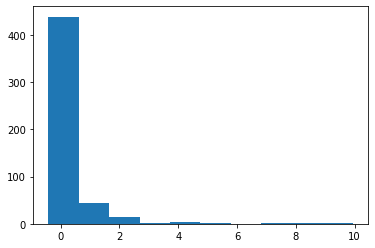

In [34]:
plt.hist(X_trans[:,0])

In [4]:
class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self,):
        return self.X.shape[0]
    
    def __getitem__(self, ix):
        return self.X[ix], self.y[ix]

In [5]:
ds = ToyDataset(X_train, y_train)
myloader = DataLoader(ds, batch_size=64, shuffle=True, drop_last=True)

In [6]:
criterion = nn.MSELoss()
optimizer = optim.Adam(m.parameters())

In [7]:
m.train()
for epoch in range(100):
    running_loss = 0.0
    running_score = 0.0
    
    for n_step, (x,y_true) in enumerate(myloader):
        y_pred = m(x)
        loss = criterion(y_pred, y_true)
        score = r2_score(
            scaler.inverse_transform(y_true.numpy()),
            scaler.inverse_transform(y_pred.detach().numpy()))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        running_score += score
    
    print(f'ep : {epoch}', 'MSE : ', running_loss / len(myloader), 'R-squqred : ', running_score / len(myloader))

ep : 0 MSE :  1.1571001768112184 R-squqred :  -0.01835622976669866
ep : 1 MSE :  0.9290132999420166 R-squqred :  0.1681592578862108
ep : 2 MSE :  0.8915402293205261 R-squqred :  0.21387973370094385
ep : 3 MSE :  0.8888368010520935 R-squqred :  0.18277364205508936
ep : 4 MSE :  0.8745867848396301 R-squqred :  0.22110326065508829
ep : 5 MSE :  0.7744320154190063 R-squqred :  0.22874428786083909
ep : 6 MSE :  0.8620406150817871 R-squqred :  0.2354815277472734
ep : 7 MSE :  0.7970944523811341 R-squqred :  0.19993458794567792
ep : 8 MSE :  0.8604711174964905 R-squqred :  0.22383487483810632
ep : 9 MSE :  0.8093324780464173 R-squqred :  0.2228549119721485
ep : 10 MSE :  0.8494763612747193 R-squqred :  0.2305659000276779
ep : 11 MSE :  0.8560098290443421 R-squqred :  0.23919687025861994
ep : 12 MSE :  0.6966538667678833 R-squqred :  0.2542540713989157
ep : 13 MSE :  0.7879696488380432 R-squqred :  0.2797380608523956
ep : 14 MSE :  0.8563932299613952 R-squqred :  0.24991865432356186
ep : 15 MS

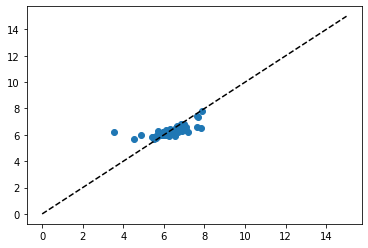

In [8]:
plt.plot([0, 15], [0, 15], '--k')
plt.scatter(scaler.inverse_transform(y_true.numpy()), scaler.inverse_transform(y_pred.detach().numpy()))

In [9]:
ds = ToyDataset(X_test, y_test)
myloader = DataLoader(ds, batch_size=64, shuffle=False, drop_last=True)

m.eval()

running_mae = 0.0
running_score = 0.0
for n_step, (x,y_true) in enumerate(myloader):
    y_pred = m(x)
    loss = criterion(y_pred, y_true)
    score = r2_score(
        scaler.inverse_transform(y_true.numpy()),
        scaler.inverse_transform(y_pred.detach().numpy()))

    running_loss += loss.item()
    running_score += score

print('MSE : ', running_loss / len(myloader), 'R-squqred : ', running_score / len(myloader))

MSE :  4.331094801425934 R-squqred :  0.25202766132063903


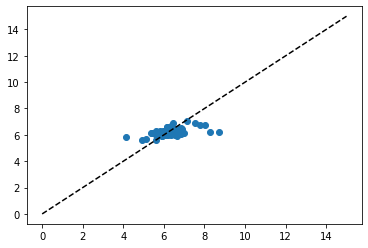

In [10]:
plt.plot([0, 15], [0, 15], '--k')
plt.scatter(scaler.inverse_transform(y_true.numpy()), scaler.inverse_transform(y_pred.detach().numpy()))

In [13]:
from PIL import Image
import numpy
im = Image.open("../tmp/cat.jpg")
np_im = numpy.array(im)[:,:,0]
print(np_im.shape)

(1280, 960)


In [18]:
backbone_dims=[64, 64, 128, 256, 512]

In [19]:
for a,b in zip(backbone_dims[:-1], backbone_dims[1:]):
    print(a,b)

64 64
64 128
128 256
256 512
